# Pixels & Perspectives: A Data-Driven Analysis of In-Game Photography

**By Azrial Ahmad | August 2025**



In [ ]:
### Introduction

Virtual photography is a rapidly growing art form where players capture the beauty of digital worlds. 
This project analyzes a dataset of over 100 top-rated in-game photos from the past year to uncover the key characteristics of a successful image. 
The goal was to use Python and SQL to find data-driven insights into the subjects, compositions, and games that resonate most with the community.

In [1]:
import sqlite3
import pandas as pd

### 1. The Canvases: Which Games are Most Popular?

The first step is to identify which games are the most popular among virtual photographers. This sets the context for the rest of the analysis.

In [2]:
# Reconnect to the database
conn = sqlite3.connect('virtual_photos.db')

sql_query_games = """
SELECT game_name, COUNT(*) as photo_count
FROM photos
GROUP BY game_name
ORDER BY photo_count DESC
LIMIT 10;
"""
top_games = pd.read_sql_query(sql_query_games, conn)
print(top_games)

                   game_name  photo_count
0     Red Dead Redemption II           19
1             Cyberpunk 2077           13
2  Assassins Creed : Shadows            5
3          Ghost of Tsuhisma            4
4              The Witcher 3            3
5     Horizon Forbidden West            3
6            Ghostwire Tokyo            3
7                Alan Wake 2            3
8           The Last of Us 2            2
9             The Last of Us            2


In [3]:
sql_query_subjects = """
SELECT subject_type, ROUND(AVG(community_score)) as avg_score
FROM photos
GROUP BY subject_type
ORDER BY avg_score DESC;
"""
top_subjects = pd.read_sql_query(sql_query_subjects, conn)
print(top_subjects)

   subject_type  avg_score
0      Portrait      404.0
1      Abstract      394.0
2  Architecture      329.0
3     Landscape      212.0
4        Action      144.0


C:\Users\WIN10\AppData\Local\Temp\ipykernel_19372\1232043059.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='photo_count', y='game_name', data=top_games, palette='viridis')


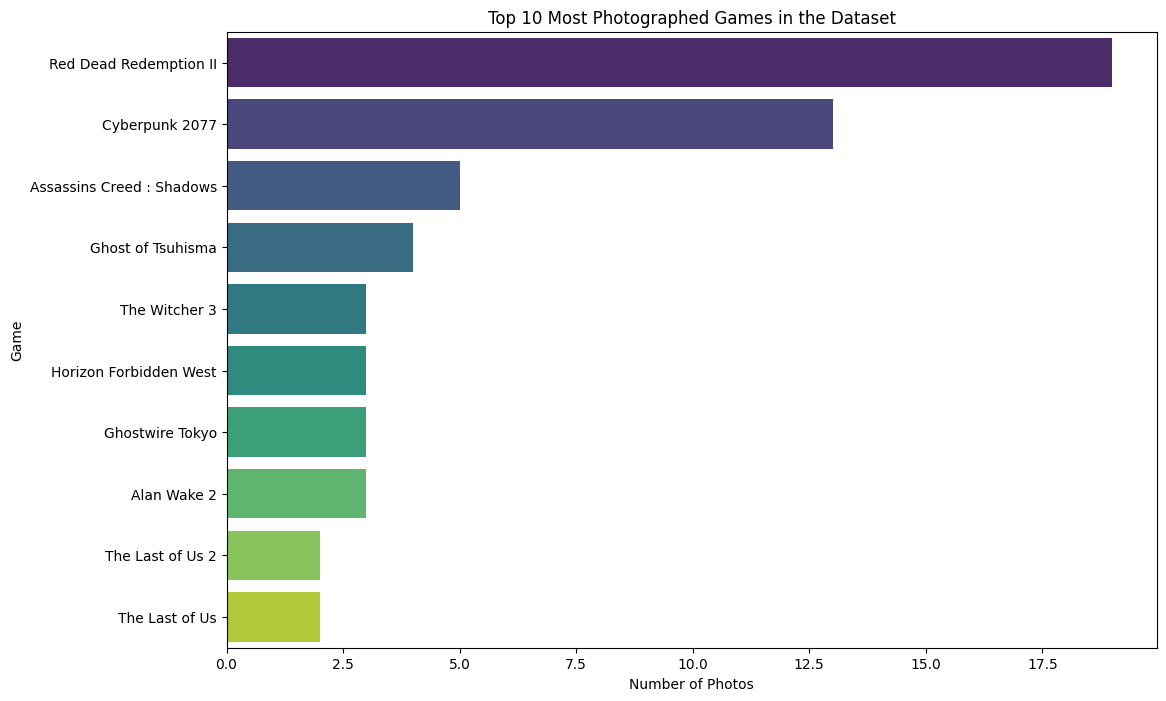

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for Question 1
plt.figure(figsize=(12, 8))
sns.barplot(x='photo_count', y='game_name', data=top_games, palette='viridis')
plt.title('Top 10 Most Photographed Games in the Dataset')
plt.xlabel('Number of Photos')
plt.ylabel('Game')
plt.show()

**Finding:** The results clearly show that visually rich, open-world games like *Red Dead Redemption II* and *Cyberpunk 2077* are the dominant platforms for photographers. This suggests that large,  environments are a key factor for the community. This also highlights a fascinating duality in the community's interest, with a deep appreciation for both the romanticized past and the speculative future.

### 2. The Blueprint: Understanding Subjects and Compositions

Next, I analyzed the relationship between the subject of a photo and the compositional style used. This helps us understand the common creative choices photographers make.

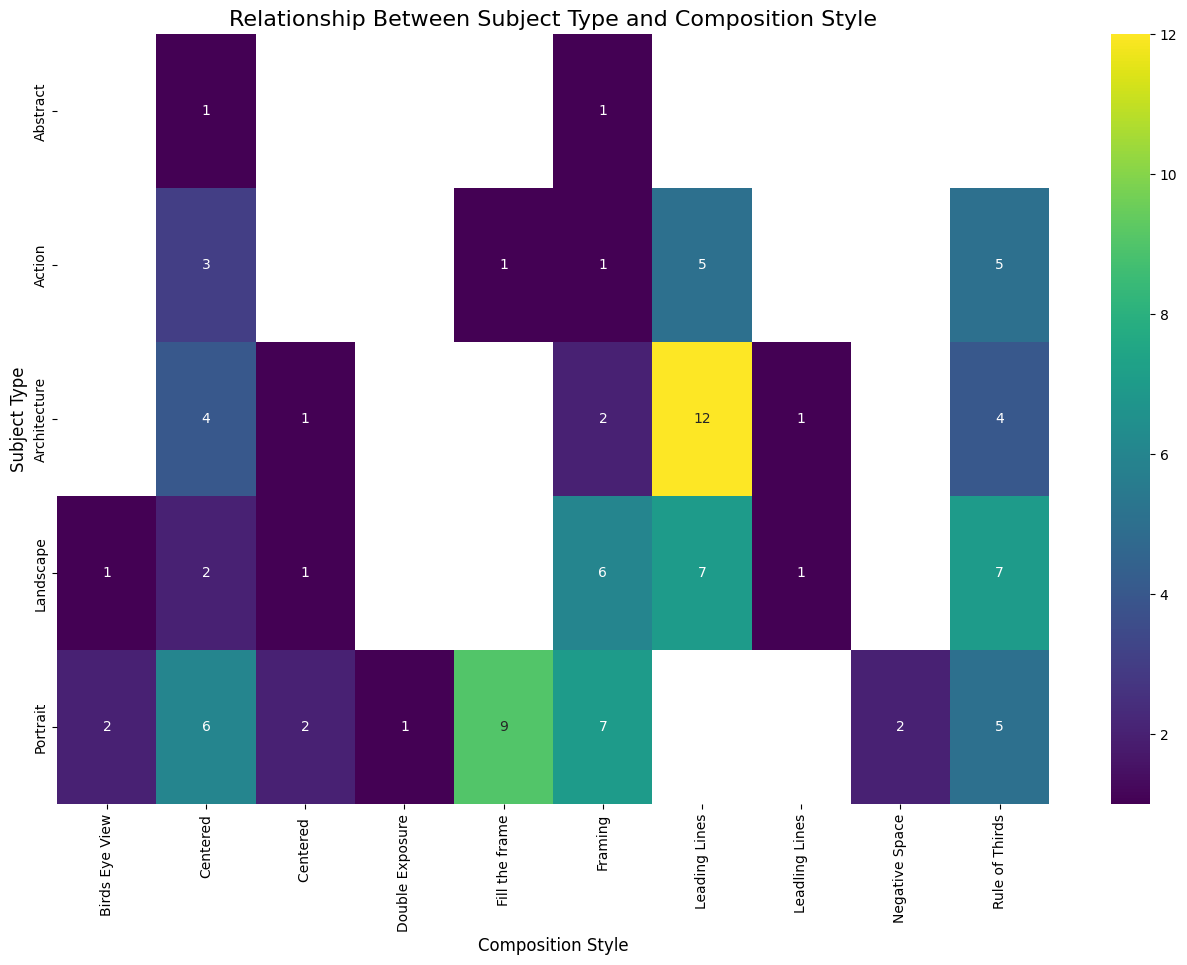

In [18]:
sql_query_combined = """
SELECT
  subject_type,
  composition_style,
  COUNT(*) AS photo_count
FROM photos
GROUP BY
  subject_type,
  composition_style;
"""

# Execute the query
combined_df = pd.read_sql_query(sql_query_combined, conn)

# --- This is the key step to prepare the data for a heatmap ---
# We pivot the table to create a grid: subjects as rows, compositions as columns
heatmap_data = combined_df.pivot(index='subject_type', columns='composition_style', values='photo_count')

# Create the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='g') # annot=True writes the numbers in the cells

# Add titles and labels for clarity
plt.title('Relationship Between Subject Type and Composition Style', fontsize=16)
plt.xlabel('Composition Style', fontsize=12)
plt.ylabel('Subject Type', fontsize=12)
plt.show()


**Finding:** The heatmap reveals strong pairings. 'Architecture' is very frequently shot with 'Leading Lines' (12 instances), while 'Portraits' often 'Fill the frame' (9 instances). This shows that photographers are using classic techniques that match their subject matter. 

### 3. The Insight: What Does Success Actually Look Like?

While it's useful to know what's common, the most important question is: which compositions are the most successful? I analyzed the average community score (upvotes) for each composition style to find out.

In [ ]:
sql_query_comps = """
SELECT composition_style, ROUND(AVG(community_score)) as avg_score
FROM photos
GROUP BY composition_style
ORDER BY avg_score DESC;
"""
top_compositions = pd.read_sql_query(sql_query_comps, conn)
print(top_compositions)

  composition_style  avg_score
0          Centered      685.0
1    Negative Space      633.0
2    Leadling Lines      568.0
3    Birds Eye View      337.0
4   Double Exposure      300.0
5     Leading Lines      220.0
6           Framing      218.0
7         Centered       205.0
8    Fill the frame      188.0
9    Rule of Thirds      167.0


C:\Users\WIN10\AppData\Local\Temp\ipykernel_19372\694663732.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_score', y='composition_style', data=top_compositions, palette='viridis')


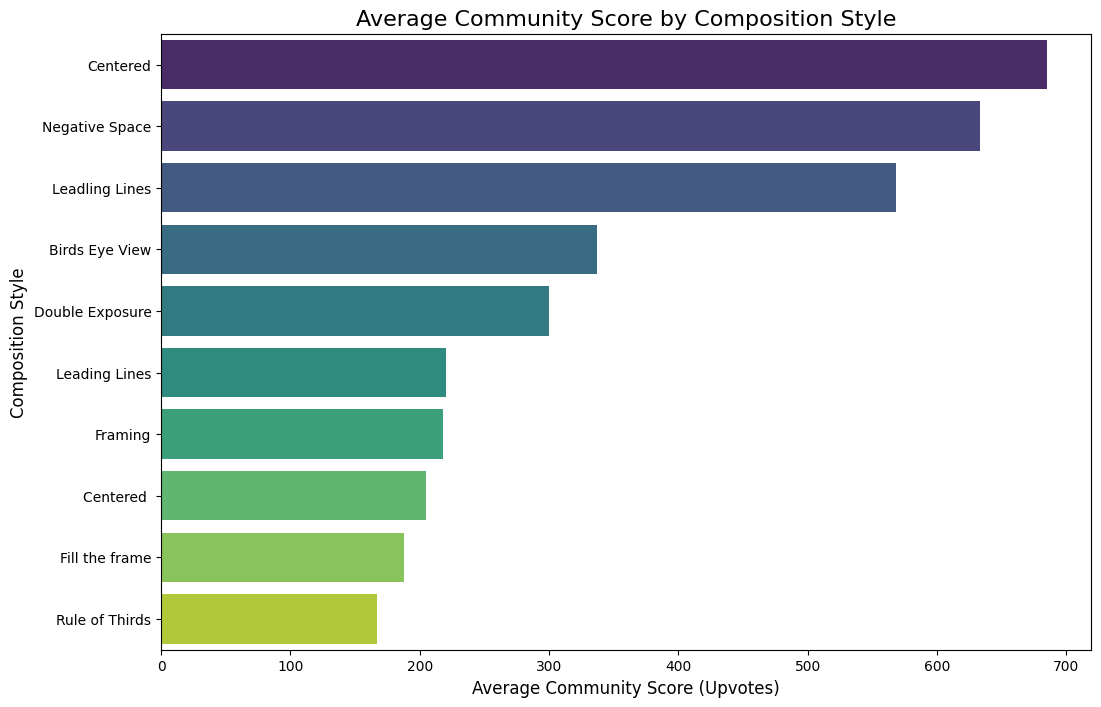

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'top_compositions' is your DataFrame with the columns 
# 'composition_style' and 'avg_score' from your SQL query.

plt.figure(figsize=(12, 8))

# Here, you just pass your variable to the 'data' parameter
sns.barplot(x='avg_score', y='composition_style', data=top_compositions, palette='viridis')

plt.title('Average Community Score by Composition Style', fontsize=16)
plt.xlabel('Average Community Score (Upvotes)', fontsize=12)
plt.ylabel('Composition Style', fontsize=12)
plt.show()

**Finding: This is the core insight of the project.** The data reveals that the most common compositions are not the highest-rated. While 'Rule of Thirds' is a frequent choice, it has one of the lowest average scores. The highest-rated compositions are **'Centered'** and **'Negative Space'**, suggesting the community rewards photos that are bold, dramatic, and minimalist over those that follow traditional rules.

### 4. Case Study: Red Dead Redemption II

To see these trends in action, I did a deep dive on the most popular game in the dataset, *Red Dead Redemption II*

In [19]:
sql_query_case = """
SELECT subject_type, COUNT(*) as photo_count
FROM photos
WHERE game_name = "Red Dead Redemption II"
GROUP BY subject_type
ORDER BY photo_count DESC;
"""
top_case = pd.read_sql_query(sql_query_case, conn)
print(top_case)

   subject_type  photo_count
0      Portrait            7
1     Landscape            6
2  Architecture            4
3        Action            2


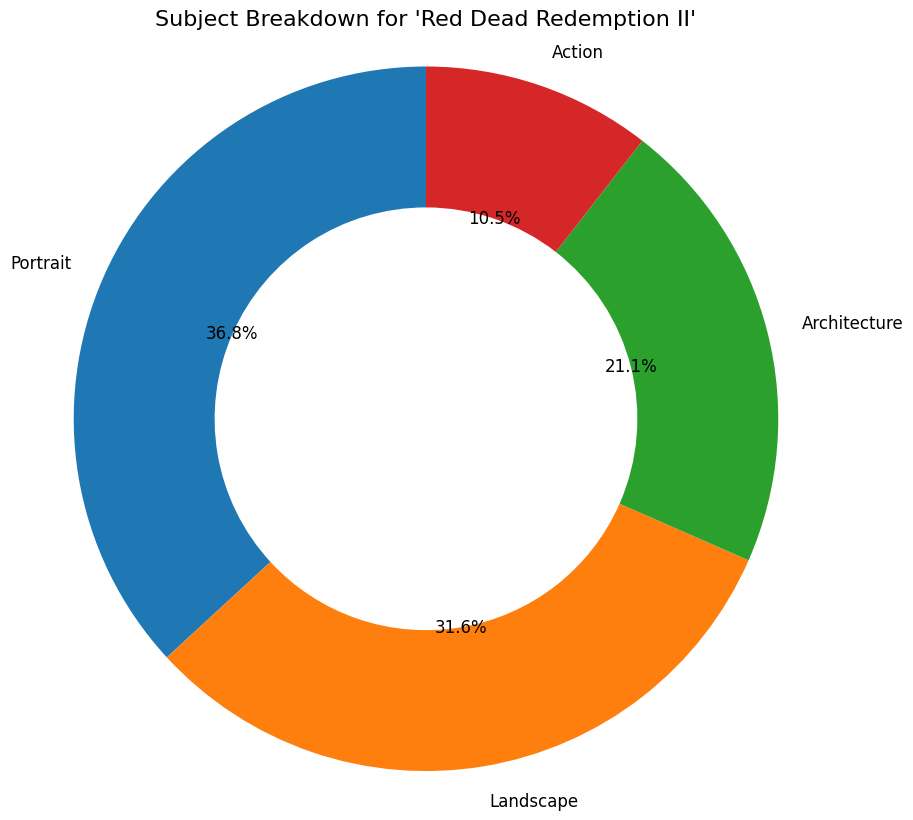

In [20]:
labels = top_case['subject_type']
sizes = top_case['photo_count']

fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12}, wedgeprops=dict(width=0.4))
ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Subject Breakdown for 'Red Dead Redemption II'", fontsize=16)
plt.show()

**Finding:** Despite being an action-adventure game, the majority of celebrated photos are not 'Action' shots. Instead, the community focuses on taking thoughtful **'Portraits'** (36.8%) and capturing the game's vast **'Landscapes'** (31.6%), reinforcing the idea that players use photo mode for artistic and contemplative purpose

### Conclusion & Reflections

This analysis of over 100 top-rated virtual photos from the past year reveals several key insights into the community's artistic preferences.

**Summary of Findings:**
The data shows a clear preference for visually expansive open-world games, with *Red Dead Redemption II* and *Cyberpunk 2077* emerging as the dominant platforms. The analysis further revealed that while photographers often use traditional compositions like the 'Rule of Thirds' for landscapes, the images that receive the highest community scores are those that employ bolder, more dramatic techniques like **'Centered'** and **'Negative Space'** compositions. This suggests that while traditional rules provide a solid foundation, the community actively rewards artists who break from convention to create more direct, high-impact visuals.

**Implications:**
The core narrative here is that the virtual photography community functions like a mature art scene. It values artistry and emotive power over technical correctness. The low average rating for the very common 'Rule of Thirds' suggests it may be seen as a "safe" or default choice, while more deliberate, impactful compositions are celebrated. Furthermore, the enduring popularity of an older game like *Red Dead Redemption II* points to the timeless appeal of its world design and aesthetics, proving that a strong artistic vision can maintain community engagement for years.

**Limitations & Future Work:**
This analysis was based on a manually classified dataset of 150 images, and "community score" (upvotes) is an imperfect proxy for artistic quality. Future analysis could expand the dataset to thousands of images for greater statistical power. It would also be interesting to include more variables, such as camera lens properties (wide vs. telephoto) or specific color palettes, to uncover even deeper trends in this emerging art form.